<a href="https://colab.research.google.com/github/guocuimi/minitf/blob/master/notebooks/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install minitf

In [0]:
%matplotlib inline
import minitf as tf
import matplotlib.pyplot as plt
# to make this notebook's output stable across runs
tf.random.set_seed(42)

In [0]:
# genearte some linear-looking data
def synthetic_linear_data(w, b, num_examples):
  # type: (float, float, int) -> tuple(numpy.ndarray, numpy.ndarray)
  X = tf.random.normal(size=num_examples)
  noise = tf.random.normal(size=num_examples)
  Y = X*w + b + noise
  return X, Y

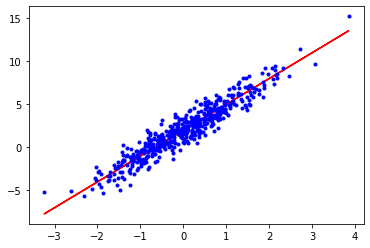

In [6]:
true_w = 3.0
true_b = 2.0
num_examples = 500
X, Y = synthetic_linear_data(true_w, true_b, num_examples)
plt.plot(X.numpy(), (X*true_w + true_b).numpy(), "r-")
plt.plot(X.numpy(), Y.numpy(), "b.")

learning_rate = 0.1

In [0]:
# linear model
def linear_model(X, W, b):
    return tf.dot(X, W) + b


# loss function
def loss(Y_hat, Y):
    return tf.reduce_mean(tf.square(Y_hat - Y) / 2)


def apply_gradients(grads_and_vars):
    for gradient, var in grads_and_vars:
        var.assign_sub(learning_rate * gradient)

In [8]:
# parameters to train
w = tf.Variable(5.0)
b = tf.Variable(0.0)
parameters = [w, b]

learning_rate = 0.1
# train loop
for epoch in range(10):
    # forward pass
    with tf.GradientTape() as tp:
        Y_hat = linear_model(X, w, b)
        current_loss = loss(Y_hat, Y)

    gradients = tp.gradient(current_loss, parameters)

    # apply gradient
    apply_gradients(zip(gradients, parameters))

    print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
          (epoch, w.numpy(), b.numpy(), current_loss.numpy()))

Epoch  0: w=4.80 b=0.20, loss=4.58056
Epoch  1: w=4.62 b=0.38, loss=3.81995
Epoch  2: w=4.46 b=0.55, loss=3.20029
Epoch  3: w=4.31 b=0.69, loss=2.69545
Epoch  4: w=4.18 b=0.83, loss=2.28415
Epoch  5: w=4.06 b=0.95, loss=1.94904
Epoch  6: w=3.95 b=1.05, loss=1.67601
Epoch  7: w=3.85 b=1.15, loss=1.45356
Epoch  8: w=3.77 b=1.24, loss=1.27231
Epoch  9: w=3.69 b=1.32, loss=1.12463


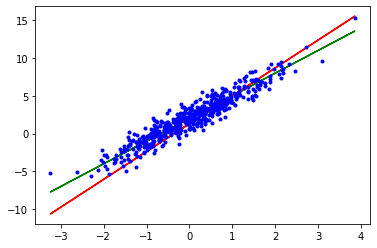

In [9]:
plt.plot(X.numpy(), linear_model(X, true_w, true_b).numpy(), "g-")
plt.plot(X.numpy(), linear_model(X, w, b).numpy(), "r-")
plt.plot(X.numpy(), Y.numpy(), "b.")